In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.integrate import solve_ivp
import sys
import importlib

from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

# Figure 1

## A

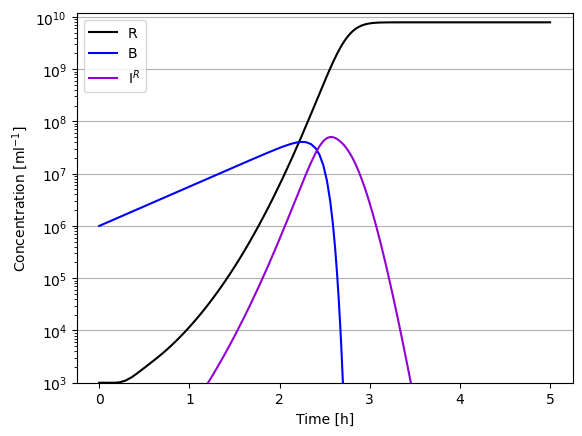

In [2]:
#Fetch default parameter values 
V = DV() 
model = "M0"

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10 #Example

#Fetch initial values 
y0 = IV(model)

#Set simulation length (mins)
t = 15*V.tau0

#Run simulation
M0sol = solve_ivp(M0,[0,t],y0,args = Const(V,model))

#Plot
BrothPlotter(model,V,M0sol.t,M0sol.y, scale = "log",figtitle = model,plotn = False)

## B

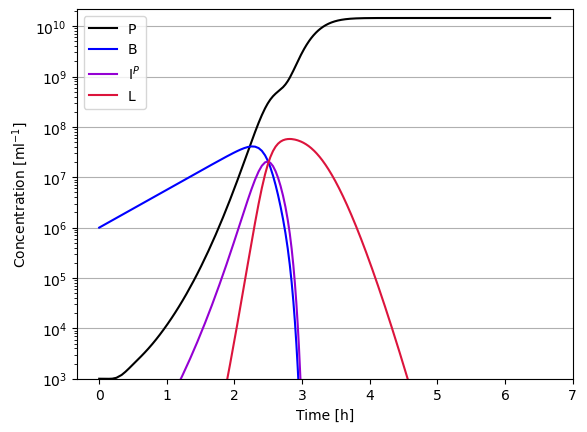

In [3]:
#Fetch default parameter values 
V = DV() 

#Option to change parameter values (see Initial_values.py)
#V.f_tau = 10

#Fetch initial values 
y0 = IV("M1")

#Set simulation length (mins)
t = 20*V.tau0

#Run simulation
M1sol = solve_ivp(M1,[0,t],y0,args = Const(V,"M1"))

#Plot
BrothPlotter("M1",V,M1sol.t,M1sol.y, scale = "log",figtitle = "M1",plotn=False)

# Fig 2

## A

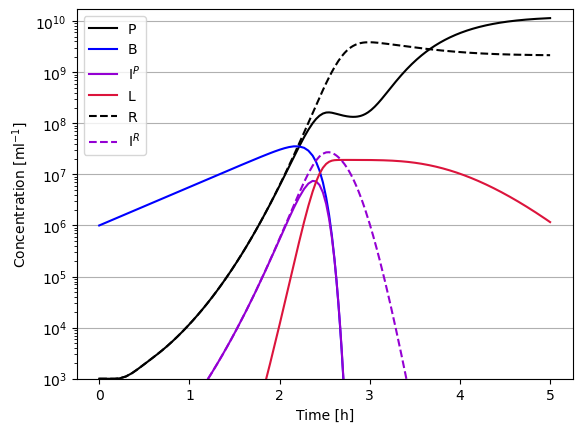

In [4]:
#Competition between wild type and r-mutant

V2 = DV() #Default values
V2.comp = 1 #Competition version
V2.f_beta, V2.f_tau = 5,5

#Intial values
y0 = IV("M1",comp = V2.comp)

#Simulation length (mins)
t = 5*60 

M1Csol = solve_ivp(M1,[0,t],y0,args = Const(V2,"M1"))
BrothPlotter("M1",V2,M1Csol.t,M1Csol.y,figtitle = "M1C",plotn = False)
#plt.ylim(1e3,5e10)

# Fig 3

## A

In [5]:
from Broth_model import *
from Plaque_model import *
from Swimming_model import *
from Initial_values import *
from Plotters import *

100%|██████████| 1800000/1800000 [01:19<00:00, 22648.13it/s]


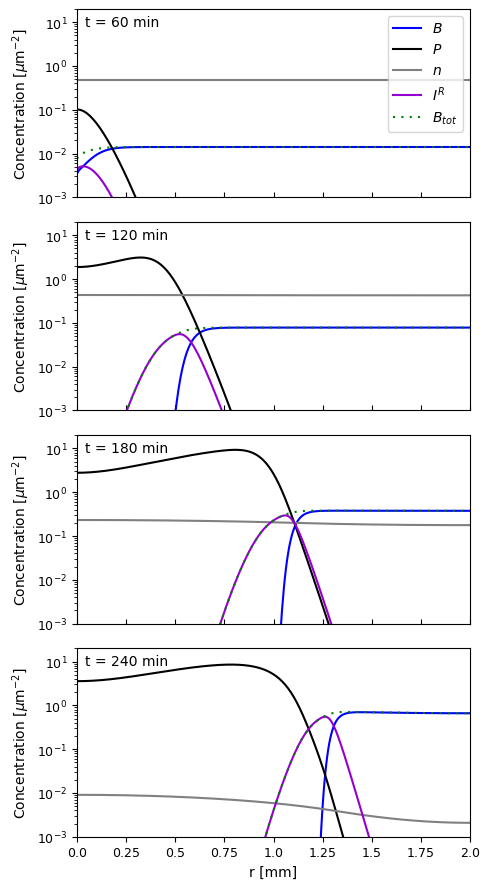

In [24]:
#r-mutant plaque

VR              = DVS(Rmax = 2*10**3,dr = 5) #Default values
y0R             = IVS("MP0",VR) #Intial values
t               = 5*60 #Simulation time
simR,savetimes  = MPShell("MP0",y0R,VR,t)
PlaquePlotter(simR,savetimes,VR,t,"MP0",Btot=True)

In [25]:
#GifGenerator(simR,savetimes,VR,"MP0",f"MP0",ylim = (0.001,20),legendloc = "upper right",Btot = True)

100%|██████████| 1800000/1800000 [02:53<00:00, 10347.59it/s]


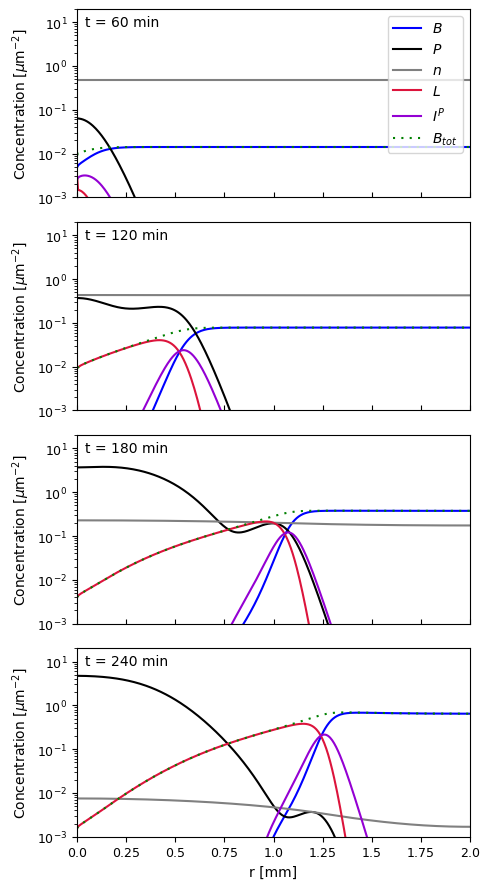

In [26]:
#r-mutant plaque

VP                  = DVS(Rmax=2*10**3,dr = 5) #Default values
VP.f_tau,VP.f_beta  = 5,5
y0P                 = IVS("MP1",VP) #Intial values
t                   = 5*60 #Simulation time
simP,savetimes      = MPShell("MP1",y0P,VP,t)
PlaquePlotter(simP,savetimes,VP,t,"MP1",Btot=True)

In [27]:
#GifGenerator(simP,savetimes,VP,"MP1",f"MP1",ylim = (0.001,20),legendloc = "upper right",Btot = True)

## B

In [28]:
#r-mutant plaque

VR2              = DVS(Rmax = 2*10**3,dr = 5) #Default values
y0R2             = IVS("MP0",VR2) #Intial values
t                = 5*60 #Simulation time
simR2,savetimes  = MPShell("MP0",y0R2,VR2,t,save_interval=10)

 20%|██        | 363297/1800000 [00:16<01:05, 22003.98it/s]


KeyboardInterrupt: 

In [ ]:
#Wild-type plaque

VP2                  = DVS(Rmax = 2*10**3,dr = 5) #Default values
VP2.f_beta,VP2.f_tau = 5,5
y0P2                 = IVS("MP1",VP2) #Intial values
simP2,savetimes      = MPShell("MP1",y0P2,VP2,t,save_interval=10)

100%|██████████| 112500/112500 [00:08<00:00, 13210.90it/s]


In [ ]:
Pdetarr = Pdet(simR2,VR2,y0R2[0,0])
tarr = np.linspace(0,t,len(simR2))
rhalfarr = rhalf(simR2,False,VR2, var = "Btot")
Pfrontarr = Pfront(simR2,VR2)
ZOIarr = rhalf(simR2,False,VR2,var = "B")
rsuperarr = rsuper(simR2,False,VR2)

tarr1 = np.linspace(0,t,len(simP2))
rhalfarr1 = rhalf(simP2,True,VP2,var = "Btot")
Pfrontarr1 = Pfront(simP2,VP2,LIN = True)
ZOIarr1 = rhalf(simP2,True,VP2,var = "B")
Pdetarr1 = Pdet(simP2,VP2,y0P2[0,0])
rsuperarr1 = rsuper(simP2,True,VP2)


In [ ]:
vrhalf = (rhalfarr[1:]-rhalfarr[:-1])/(tarr[1]-tarr[0])
vPfront = (Pfrontarr[1:]-Pfrontarr[:-1])/(tarr[1]-tarr[0])
vZOI = (ZOIarr[1:]-ZOIarr[:-1])/(tarr[1]-tarr[0])
vrsuper = (rsuperarr[1:]-rsuperarr[:-1])/(tarr[1]-tarr[0])
vPdet = (Pdetarr[1:]-Pdetarr[:-1])/(tarr[1]-tarr[0])
vrhalf1 = (rhalfarr1[1:]-rhalfarr1[:-1])/(tarr[1]-tarr[0])
vPfront1 = (Pfrontarr1[1:]-Pfrontarr1[:-1])/(tarr[1]-tarr[0])
vZOI1 = (ZOIarr1[1:]-ZOIarr1[:-1])/(tarr[1]-tarr[0])
vrsuper1 = (rsuperarr1[1:]-rsuperarr1[:-1])/(tarr[1]-tarr[0])
vPdet1 = (Pdetarr1[1:]-Pdetarr1[:-1])/(tarr[1]-tarr[0])

In [ ]:
for i,v in enumerate(vrsuper):
    if v >= max(vrsuper)*0.8:
        expansionstart = tarr[i]
        break
for i,v in enumerate(vrsuper[::-1]):
    if v >= max(vrsuper)*0.85:
        expansionend = tarr[-i-2]
        break
expansionstart,expansionend

for i,v in enumerate(vrsuper1):
    if v >= max(vrsuper1)*0.8:
        expansionstart1 = tarr[i]
        break
for i,v in enumerate(vrsuper1[::-1]):
    if v >= max(vrsuper1)*0.85:
        expansionend1 = tarr[-i-2]
        break
expansionstart1,expansionend1

(62.06896551724138, 144.82758620689657)

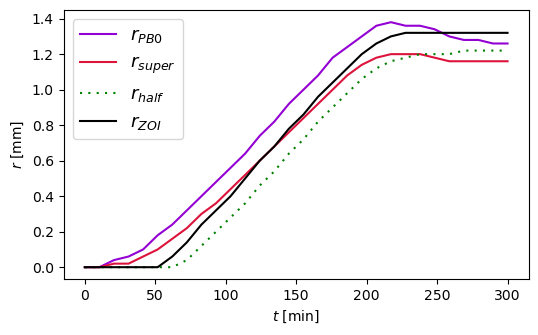

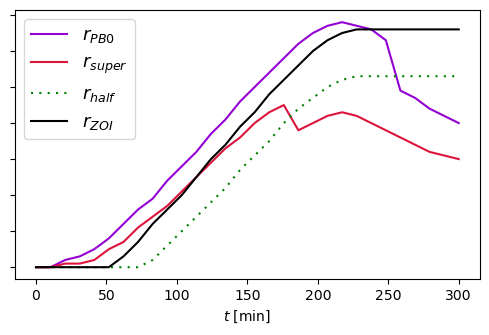

In [ ]:
plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]")
plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP0expansion.jpg")
#plt.title("MP0")

plt.figure(figsize = (6,3.5))
#plt.plot(tarr,Pfrontarr1,label = r"$r_{front}$",color = "k")
plt.plot(tarr,Pdetarr1,label = r"$r_{PB0}$",color = "darkviolet")
plt.plot(tarr,rsuperarr1,label = r"$r_{super}$",color = "crimson")
plt.plot(tarr,rhalfarr1,label = r"$r_{half}$",color = "green",ls = (0,(1,3)))
plt.plot(tarr,ZOIarr,label = r"$r_{ZOI}$",color = "k")
plt.xlabel(r"$t$ [min]")
#plt.ylabel(r"$r$ [mm]")
plt.legend(fontsize = 13)
plt.savefig("MP1expansion.jpg")
plt.yticks([0,0.2,0.4,0.6,0.8,1,1.2,1.4],[None,None,None,None,None,None,None,None])
#plt.title("MP1")
plt.show()